In [60]:
# Importando as bibliotecas necessárias:
import pydot
import numpy as np
import seaborn as sns
from six import StringIO
import matplotlib.pyplot as plt
from IPython.display import Image  
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

# Importando bibliotecas Scikit Learn:
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importando as métricas necessárias:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

**a**. Gere um conjunto de dados das luas usando: *make_moons(n_samples=500, noise=0.30, random_state=42)*.

In [61]:
# Definindo a semente:
semente = 42

# Criando o dataset
X, y = make_moons(n_samples = 500, noise = 0.3, random_state = semente)

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

**b**. Divida-o em um conjunto de treinamento e um conjunto de testes usando: *train_test_split (X, y, test_size=0.2, random_state=42)*.

In [62]:
# Definição da separação para validação:
test_size = 0.2

# Faz a segregação dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=test_size, random_state=semente)

# Imprime a operação feita:
print('Separação feita em {}% para validação e {}% para treinamento'.format((test_size * 100), (((test_size - 1) * 100) * -1)))

Separação feita em 20.0% para validação e 80.0% para treinamento


**c**. Plote os dados do conjunto de treinamento em relação às classes a que
pertencem. Ou seja, defina marcadores diferentes para identificar cada um das
classes na figura. Por exemplo, use círculos para denotar exemplos que
pertencem à classe 0 e quadrados para denotar exemplos que pertencem à
classe 1.


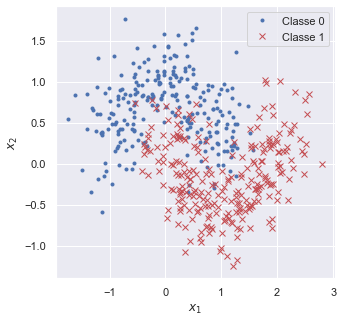

In [63]:
# Plotagem do dataset:
fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], 'b.', label='Classe 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Classe 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

**d**. Instancie, treine e realize a predição com o conjunto de testes utilizando uma
árvore de decisão: *DecisionTreeClassifier(random_state=42)*
e. Qual a precisão desta classificação?


In [64]:
# Instânciando a árvore de decisão:
dt = DecisionTreeClassifier(random_state=semente)

# Faz o treinamendo:
dt.fit(X_train, y_train)

# Faz a predição:
y_dt = dt.predict(X_test)

**F**. Instancie, treine e realize a predição com o conjunto de testes utilizando
bagging ensemble com árvores de decisão:
*BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)*

In [65]:
# Instânciando o Bagging Classifier
bc = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

# Fazendo o treinamento:
bc.fit(X_train, y_train)

# Fazendo a predição:
y_bc = bc.predict(X_test)

**g**. Qual a precisão desta classificação?

In [66]:
# Gerando os resultados:
dt_prec = accuracy_score(y_test, y_dt)
bc_prec = accuracy_score(y_test, y_bc)

# Comparando os resultados:
print('Os classificadores apresentam acurácia de:')
print('DecisionTree = {:.2f}%'.format(dt_prec * 100))
print('Bagging      = {:.2f}%'.format(bc_prec * 100))

Os classificadores apresentam acurácia de:
DecisionTree = 82.00%
Bagging      = 90.00%


**h**. Para cada um dos 2 classificadores plote as seguintes informações


■ A matriz de confusão.


**DecisionTree**

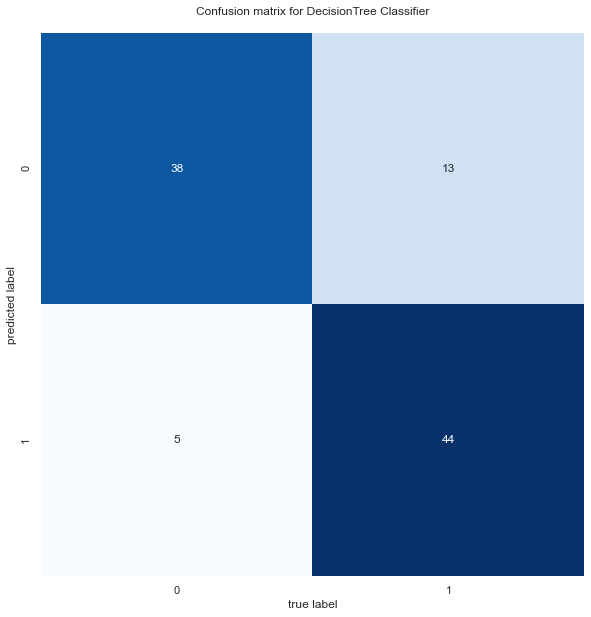

In [67]:
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y_test, y_dt)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for DecisionTree Classifier\n")
plt.savefig('confusion_matrix_DecisionTree Classifier.png', dpi=600)
plt.show()

**Bagging**

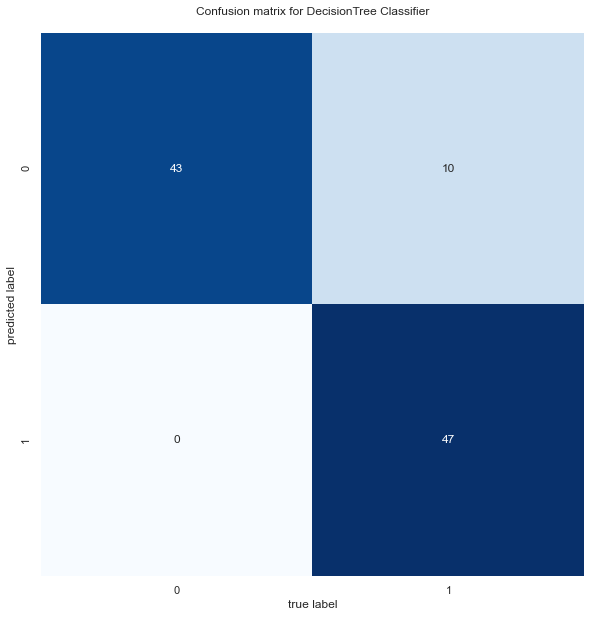

In [68]:
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(y_test, y_bc)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix for DecisionTree Classifier\n")
plt.savefig('confusion_matrix_DecisionTree Classifier.png', dpi=600)
plt.show()

■ A fronteira de decisão.


**DecisionTree**

(251, 327)


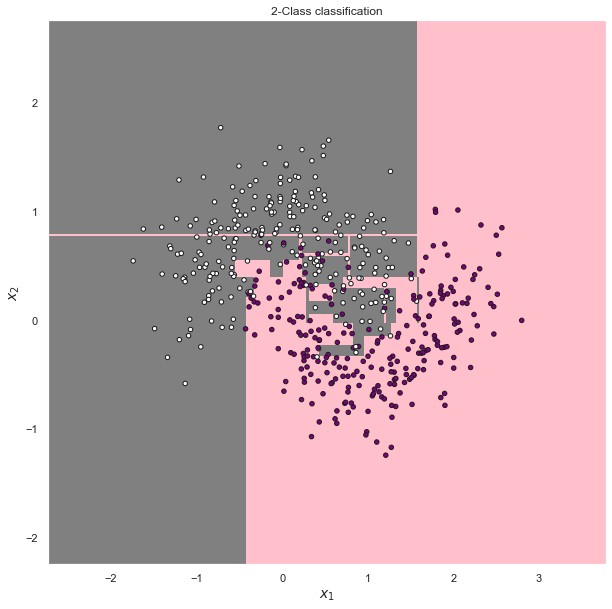

In [80]:
# Definindo o passo de aprendizagem:
h = .02 

# Criando os mapas de cores:
cmap_light = ListedColormap(['grey', 'cyan', 'pink'])
cmap_bold = ListedColormap(['white', 'c', 'purple'])

plt.figure(figsize=(10, 10))

# Criando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Colocando o resultado em cores:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotando os pontos de treinamento:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

# Por fim, plotando:
plt.show()

**Bagging**

(251, 327)


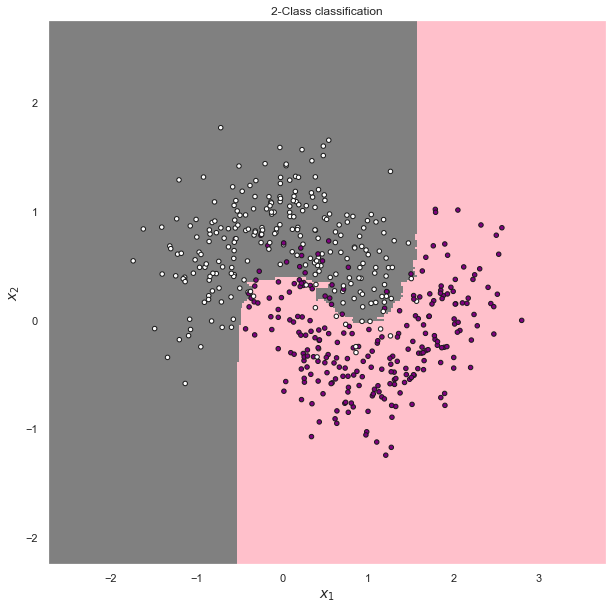

In [81]:
# Definindo o passo de aprendizagem:
h = .02 

# Criando os mapas de cores:
cmap_light = ListedColormap(['grey', 'cyan', 'pink'])
cmap_bold = ListedColormap(['white', 'c', 'purple'])

plt.figure(figsize=(10, 10))

# Criando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = bc.predict(np.c_[xx.ravel(), yy.ravel()])

print(xx.shape)

# Colocando o resultado em cores:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotando os pontos de treinamento:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

# Por fim, plotando:
plt.show()

■ A curva ROC.

**DecisionTree**

In [82]:
# Conseguindo as probabilidades de cada classe:
y_prob = dt.predict_proba(X_test)

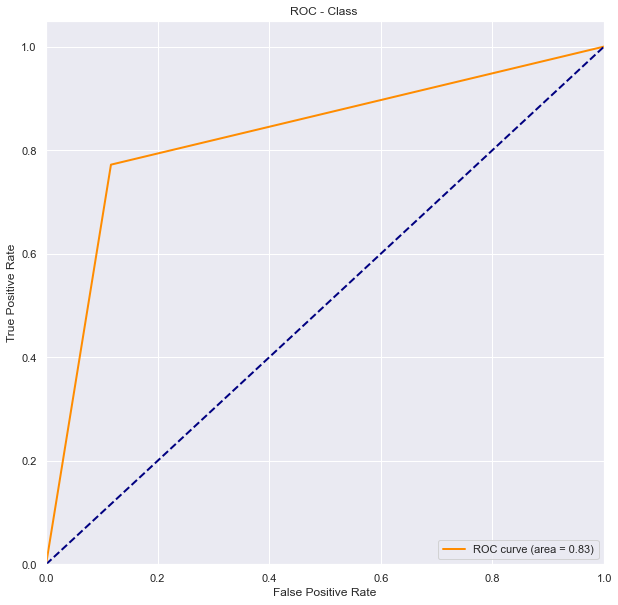

In [83]:
# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

# Plotando 
plt.show()

**Bagging**

In [84]:
# Conseguindo as probabilidades de cada classe:
y_prob = bc.predict_proba(X_test)

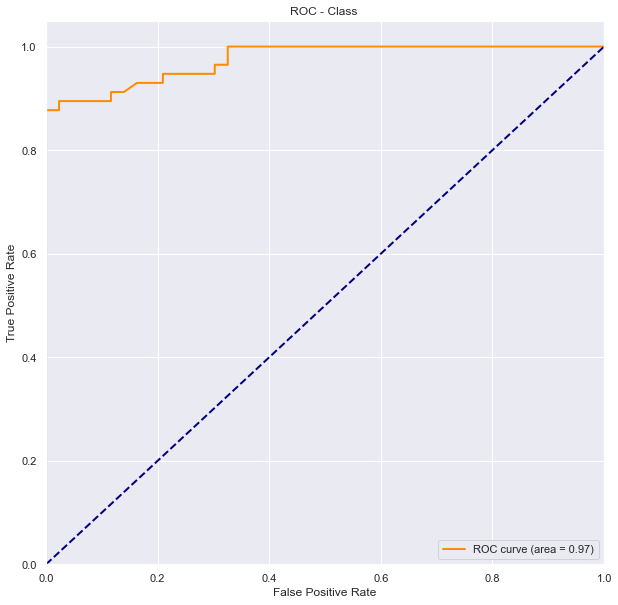

In [85]:
# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

# Plotando 
plt.show()

## Resposta teórica

É notável em todos os testes o melhor desempenho quando usado o ensamble bagging. Possuindo uma acurácia melhor e demonstrando isso em todas as métricas avaliadas como matriz de confusão, fronteira de decisão e curva ROC. Portando, com o uso do ensamble bagging o modelo será melhor em generalizar para outro conjunto de dados.